#### Har jobbet med Einar Therkelsen

# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from six import StringIO
from IPython.display import Image  
import pydotplus


## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.

   *The curve is plotted below.*

   $$Energy = 3.2260 * Net Activity + 0.1847$$
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

   *Looking at the distrubution, we can see that the residuals are mostly centered around 0 and symmetrically distributed. this suggest that the model does not systematically over- or underestimate the values, and the prediction errors are randomly distributed*
   
   *An unbiased estimator is a statistical method where the expected value of the estimate equals the true parameter.*

---

In [2]:
%load_ext autoreload
%autoreload 2

In [127]:
# Import your implementation
from linear_regression import LinearRegression 

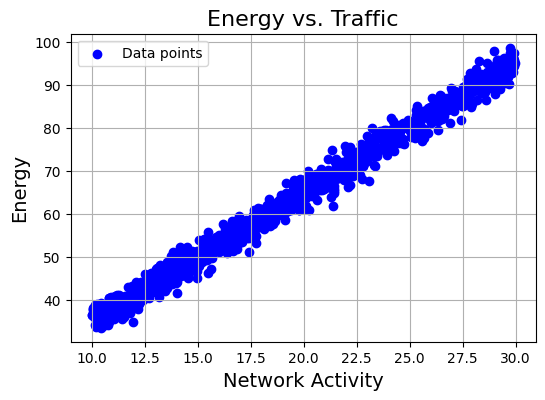

In [128]:
# Data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

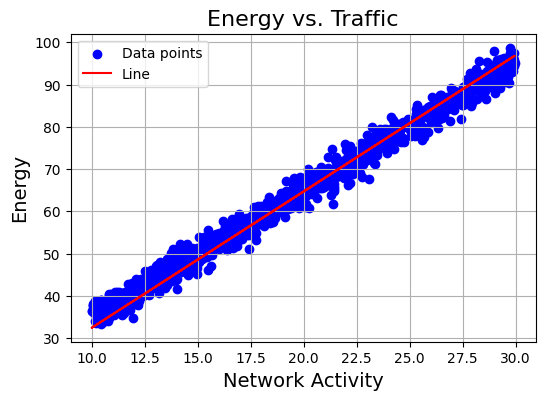

2 a. Energy = 3.2260 * Net_Activity + 0.1847


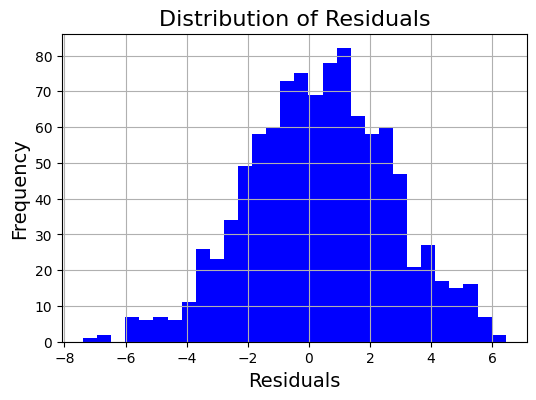

In [133]:
lin_reg = LinearRegression()

lin_reg.fit(data['Net_Activity'], data['Energy'])

lin_reg.predict(data['Net_Activity'])

model = LinearRegression(lr=0.0001, iterations=1000)
X = data['Net_Activity'].values.reshape(-1, 1)
y = data['Energy'].values
model.fit(X, y)

weight = model.w[0]
bias = model.b

y_pred = model.predict(X)

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], y_pred, color='red', label='Line')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

print(f"2 a. Energy = {weight:.4f} * Net_Activity + {bias:.4f}")

residuals = y - y_pred

plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, color='blue')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Residuals', fontsize=16)
plt.grid(True)
plt.show()




## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

      *Bad initial performance can be explained by insufficient features. To address this, we engineered a new feature (x2) by combining x0 and x1. This improved the model’s ability to capture the relationship between the inputs and the target. Apart from feature engineering, poor performance could also result from suboptimal hyperparameters, was adjusted along the way.* 


   b. What is the model's inductive bias. Why is it important?

      *Inductive bias refers to the assumptions a model makes about the underlying data structure. In logistic regression, the most significant assumption is that the data can be separated linearly. This bias is important because it simplifies the model and allows for efficient training, but it can be a limitation when the data has complex, non-linear patterns that a linear model cannot capture.*

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?

      *The DecisionTreeClassifier did solve the problem. This is because decision trees can handle non-linear relationships between the features and the target variable. When logistic regression assumes a linear separation, decision trees recursively split the data into subsets based on the most informative features. This allows them to model interactions and non-linear patterns in the data, which is why it performed better in this case.*
   
   d. Plot the ROC curve
      
      *Curve is plotted below*

In [201]:
# Leser inn data og splitter i trenings- og testsett
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

# Splitter data i X og y
X_train = train[['x0', 'x1']]
y_train = train['y']
X_test = test[['x0', 'x1']]
y_test = test['y']

# Kombinerer x0 og x1 til en ny feature x2
train['x2'] = train['x0'] * train['x1']
test['x2'] = test['x0'] * test['x1']

# Lager nye X_train og X_test med x0, x1 og x2
X_train = train[['x0', 'x1', 'x2']]
X_test = test[['x0', 'x1', 'x2']]

/var/folders/yf/bkw8fk_x7fg7shg133rz9hkh0000gn/T/ipykernel_66718/3109797443.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['x2'] = train['x0'] * train['x1']
/var/folders/yf/bkw8fk_x7fg7shg133rz9hkh0000gn/T/ipykernel_66718/3109797443.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['x2'] = test['x0'] * test['x1']


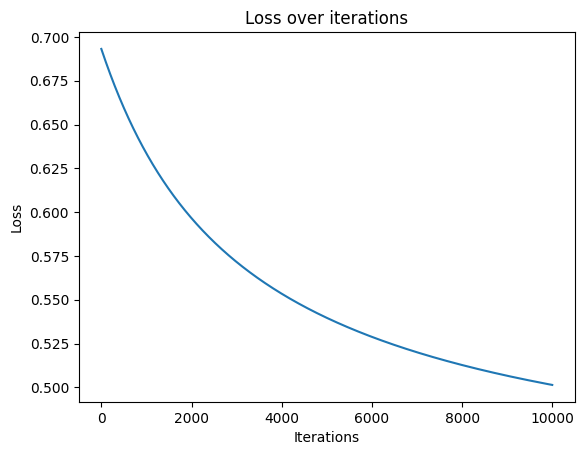

Logistic Regression Accuracy: 0.90


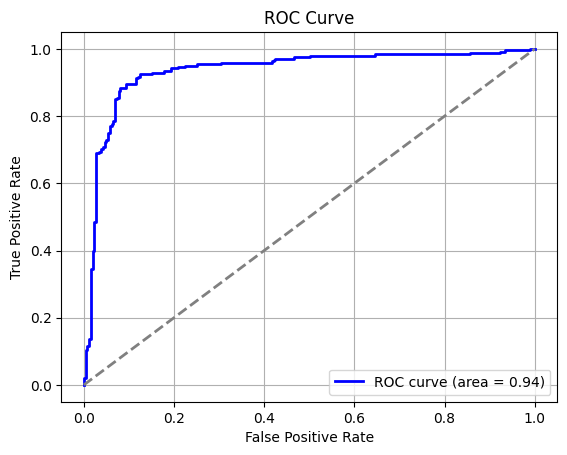

In [202]:
from logistic_regression import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

# Lager en modell og trener den
model = LogisticRegression()
model.fit(X_train, y_train)

# Predikerer og evaluerer modellen
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

y_proba = model.predict_proba(X_test) # Probability estimates
fpr, tpr, _ = roc_curve(y_test, y_proba) # Compute ROC curve
roc_auc = auc(fpr, tpr) # Compute ROC area

# Plotter ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()


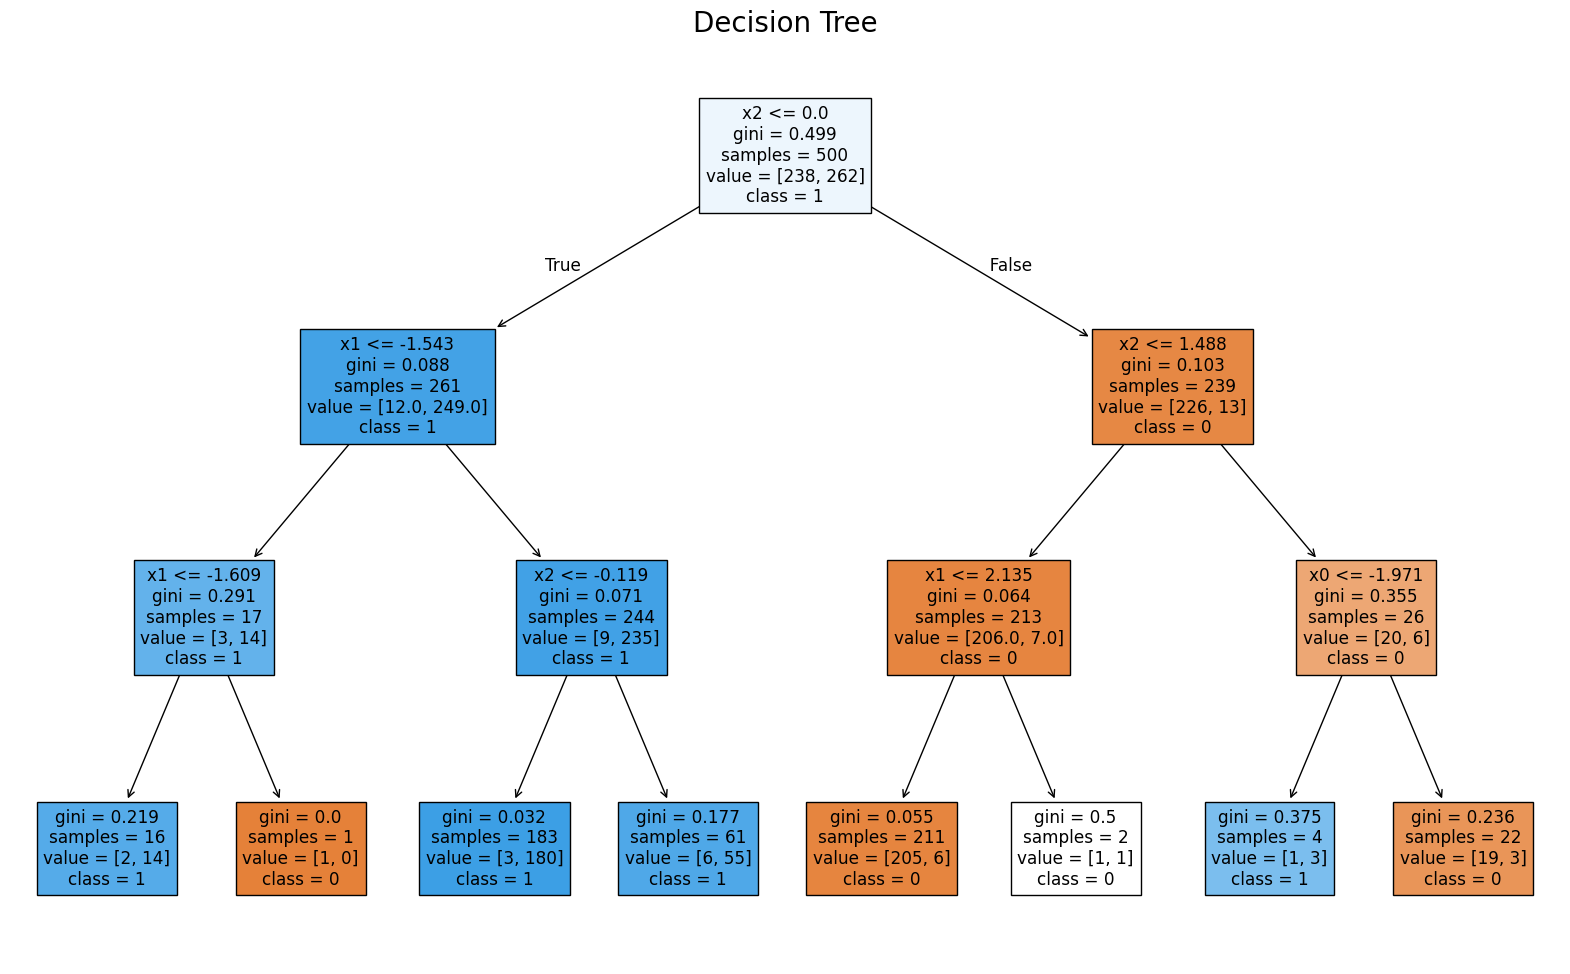

Decision Tree Accuracy: 0.9400


In [208]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Lager en Decision Tree modell og trener den
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3, 
    random_state=42 
)
dt_model.fit(X_train, y_train)

# Plotter decision tree
plt.figure(figsize=(20, 12)) 
plot_tree(dt_model, feature_names=['x0', 'x1', 'x2'], class_names=['0', '1'], filled=True)
plt.title('Decision Tree', size=20)
plt.show()

# Predikerer og evaluerer modellen
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   *To break the threshold, I needed to encode data_stream_3. This was done using the OneHotEncoder. This encoding helped the model, which led to improved performance and a higher ROC AUC score. Additionally, I adjusted the max_depth hyperparameter of the DecisionTreeClassifier, to prevent overfitting.*

   b. Justify ROC AUC usage. Plot and interpret ROC.

   *ROC AUC is used because it provides a more comprehensive evaluation of the model's performance. Unlike accuracy, which is tied to a specific threshold (usually 0.5), ROC AUC evaluates the model's ability to separate the classes. This is useful when dealing with imbalanced data.*

   *The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at different thresholds. A high AUC (close to 1) indicates that the model can effectively distinguish between the two classes. A value of 0.5 would indicate random guessing. By plotting the ROC curve, we can visually assess the trade-off between TPR and FPR, and select the most appropriate threshold.*

   *The decision tree model has an AUC of 0.72, meaning it does a reasonable job of distinguishing between critical and non-critical communications but leaves room for improvement. The random forest model slightly outperforms the decision tree with an AUC of 0.73, showing that the ensemble of trees captures more complex patterns in the data.*
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.
   
   *RandomForestClassifier generally performs better than a single DecisionTreeClassifier because it builds multiple trees and averages their predictions. This helps to reduce overfitting and increases the model's robustness. In this case, the Random Forest model achieved an AUC of 0.73, which is marginally better than the Decision Tree’s AUC of 0.72. This suggests that while the random forest model captures more subtle patterns, the overall improvement is modest.*

---

In [169]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

train['data_stream_3'] = train['data_stream_3'].apply(lambda x: (x*1000)%2)
test['data_stream_3'] = test['data_stream_3'].apply(lambda x: (x*1000)%2)

X_train = train.drop(columns=['target'])
y_train = train['target']

X_test = test.drop(columns=['target'])
y_test = test['target']

dec_model = DecisionTreeClassifier(max_depth=3, criterion='log_loss')   

dec_model.fit(X_train, y_train)

probabilities = dec_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, probabilities)
roc_auc = roc_auc_score(y_test, probabilities)

print(f'Decision Tree Classifier AUC: {roc_auc:.4f}')

Decision Tree Classifier AUC: 0.6945


In [170]:
from sklearn.preprocessing import OneHotEncoder

dt_clf = DecisionTreeClassifier(max_depth=6, criterion='log_loss')

# Encoder data_stream_3 for å øke AUC
encoder = OneHotEncoder(drop='if_binary', sparse_output=False)

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

X_train_encoded['data_stream_3'] = encoder.fit_transform(X_train['data_stream_3'].values.reshape(-1, 1))
X_test_encoded['data_stream_3'] = encoder.transform(X_test['data_stream_3'].values.reshape(-1, 1))

dt_clf.fit(X_train_encoded, y_train)

probabilities = dt_clf.predict_proba(X_test_encoded)[:, 1]

dt_fpr, dt_tpr, thresholds = sklearn.metrics.roc_curve(y_test, probabilities)
dt_roc_auc = roc_auc_score(y_test, probabilities)

print(f'Decision Tree Classifier (med enocodet data_stream_3) AUC: {dt_roc_auc:.2f}')

Decision Tree Classifier (med enocodet data_stream_3) AUC: 0.72


In [176]:
rf_clf = RandomForestClassifier(max_depth=10, n_estimators=100, criterion='log_loss')
rf_clf.fit(X_train_encoded, y_train)

probabilities = rf_clf.predict_proba(X_test_encoded)[:, 1]

rf_fpr, rf_tpr, rf_thresholds = sklearn.metrics.roc_curve(y_test, probabilities)
rf_roc_auc = roc_auc_score(y_test, probabilities)

print(f'Random Forest Classifier  AUC: {rf_roc_auc:.2f}')

Random Forest Classifier  AUC: 0.73


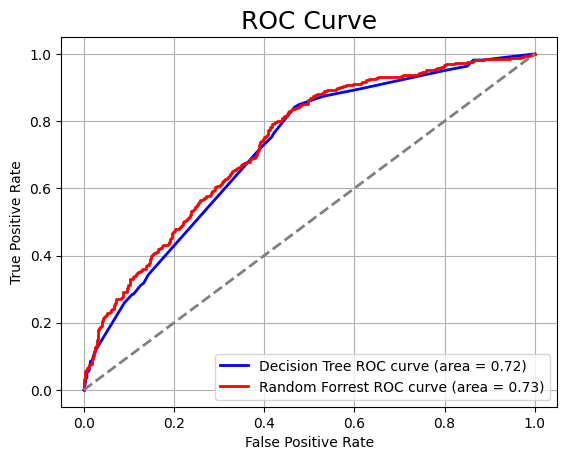

In [177]:
plt.plot(dt_fpr, dt_tpr, color='blue', lw=2, label=f'Decision Tree ROC curve (area = {dt_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, color='red', lw=2, label=f'Random Forrest ROC curve (area = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC Curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   *I didn't manage to get below the threshold. I tried manipulating the hyperparams a thousand times, tried both with and without using Pool, and making several models to use the average to calculate RMSLE. I tried using both GridSearch and HalvingRandomSearchCV, but still didn't manage to get the RMSLE low enough.*

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   *RMSLE (Root Mean Squared Logarithmic Error) is useful when the relative error is more important than absolute error. It gives a higher penalty to under-predictions compared to over-predictions and is particularly suited for tasks where the target variable spans multiple orders of magnitude, as it smooths the differences between small and large values. This is important in predicting the Nexus Rating, as some buildings might produce significantly more energy than others. The loss function I used was RMSE (Root Mean Squared Error) with a log-transformed target variable.*

   c. Plot and interpret feature importances

   *Feature importances are plotted below. What we can see from the plot is that energy_footprint is by far the most important feature. This suggests that the energy efficiency is an important factor when deciding the Nexus Rating of a building. The rest of the features are pretty similar, but i would say that the order of the features are quite reasonable considering the target, which is the overall Nexus Rating*

   d. Describe your ensembling techniques

   *I tried to do model averaging. Even though it didn't work, it is a smart techniques to try to generalize the model and smooth out overfitting from individual models.*

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

   *To make sure my model works on unseen data IRL, I would create a validation set from the training data to tune the hyperparams before predicting on the test set. I would also "restrain" the variables of the model to prevent overfitting to the training data - (limit the depth, adding dropout, etc).*

---

In [179]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

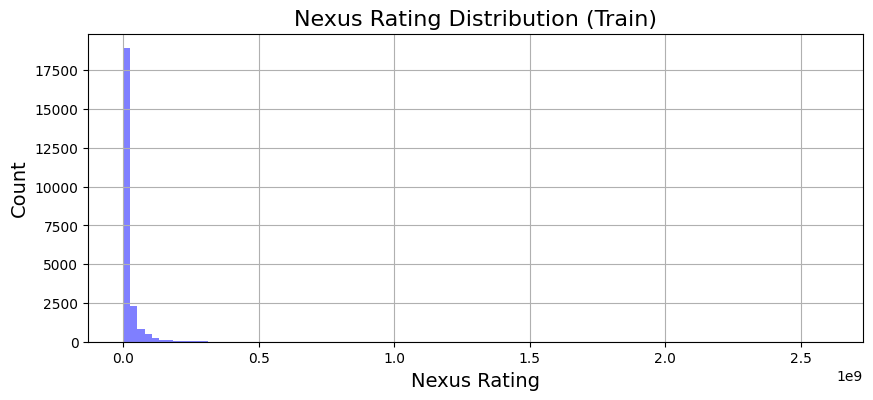

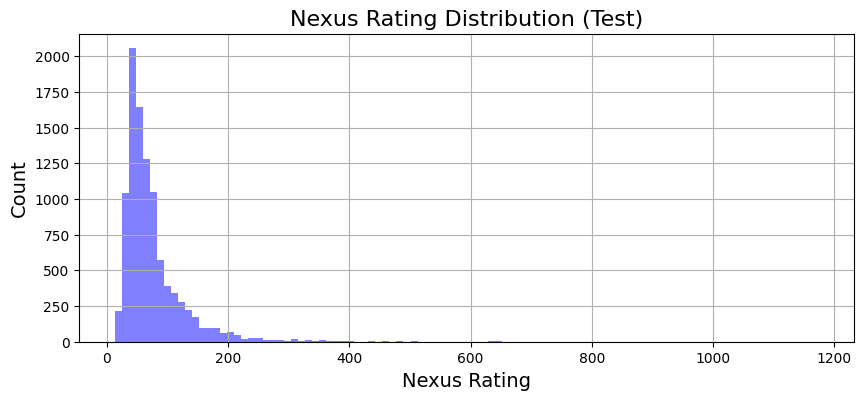

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
test['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Test Target Distributuon')
ax.set_title('Nexus Rating Distribution (Test)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [181]:
train.head(10)

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
0,3.0,7139520.0,59.2,12.5,31.0,2.0,2.0,NaN,2.65,0.0,2.0,0.0,1.0,NaN,NaN,NaN,1.0
1,NaN,10500000.0,88.0,14.2,48.0,18.0,3.0,1.0,NaN,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0
2,3.0,9019650.0,78.5,22.5,40.8,12.0,3.0,NaN,2.65,0.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0
3,NaN,10500000.0,88.0,14.0,48.0,18.0,3.0,NaN,NaN,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0
4,NaN,13900000.0,78.0,17.0,35.0,7.0,2.0,1.0,2.90,1.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0
5,3.0,5464800.0,36.0,5.8,21.6,1.0,2.0,NaN,2.65,1.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0
6,NaN,7100000.0,38.5,7.4,18.9,17.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0
7,NaN,5950000.0,37.6,9.8,19.0,16.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0
8,NaN,8700000.0,106.9,12.8,67.9,21.0,3.0,1.0,2.80,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
9,NaN,10990000.0,63.6,10.4,32.5,7.0,2.0,1.0,NaN,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0


In [182]:
test.head(10)


,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
0,NaN,71.40,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,34000000.0
1,NaN,54.00,4.0,50.0,4.0,1.0,NaN,3.00,NaN,NaN,1.0,0.0,NaN,NaN,3.0,1.0,8700000.0
2,3.0,39.40,19.6,11.2,10.0,1.0,NaN,2.65,1.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0,6177920.0
3,NaN,60.90,NaN,NaN,5.0,2.0,1.0,NaN,1.0,0.0,0.0,1.0,NaN,NaN,0.0,1.0,8900000.0
4,NaN,34.00,9.0,17.0,14.0,1.0,NaN,2.75,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,5550000.0
5,NaN,40.00,10.0,19.0,15.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,6850000.0
6,3.0,61.00,11.7,33.8,3.0,3.0,NaN,2.65,0.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0,7381000.0
7,NaN,60.00,12.0,32.0,21.0,2.0,1.0,2.80,0.0,2.0,1.0,1.0,NaN,NaN,2.0,2.0,10700000.0
8,NaN,38.00,7.5,19.0,17.0,1.0,NaN,NaN,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,6099000.0
9,NaN,23.29,NaN,NaN,11.0,1.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,4500000.0


In [183]:
# Ser at kolonnene i test er stokket om på (kolonnne i test er forskjøvet), så vi må bytte om på disse

old_nexus_rating = test['nexus_rating']
old_energy_footprint = test['energy_footprint']
old_core_reactor_size = test['core_reactor_size']
old_harvesting_space = test['harvesting_space']
old_vertical_alignment = test['vertical_alignment']
old_power_chambers = test['power_chambers']
old_energy_flow_design = test['energy_flow_design']
old_upper_collector_height = test['upper_collector_height']
old_shared_conversion_units = test['shared_conversion_units']
old_isolated_conversion_units = test['isolated_conversion_units']
old_internal_collectors = test['internal_collectors']
old_external_collectors = test['external_collectors']
old_ambient_harvesters = test['ambient_harvesters']
old_shielded_harvesters = test['shielded_harvesters']
old_efficiency_grade = test['efficiency_grade']
old_grid_connections = test['grid_connections']

test['nexus_rating'] = old_grid_connections
test['energy_footprint'] = old_nexus_rating
test['core_reactor_size'] = old_energy_footprint
test['harvesting_space'] = old_core_reactor_size
test['vertical_alignment'] = old_harvesting_space
test['power_chambers'] = old_vertical_alignment
test['energy_flow_design'] = old_power_chambers
test['upper_collector_height'] = old_energy_flow_design
test['shared_conversion_units'] = old_upper_collector_height
test['isolated_conversion_units'] = old_shared_conversion_units
test['internal_collectors'] = old_isolated_conversion_units
test['external_collectors'] = old_internal_collectors
test['ambient_harvesters'] = old_external_collectors
test['shielded_harvesters'] = old_ambient_harvesters
test['efficiency_grade'] = old_shielded_harvesters
test['grid_connections'] = old_efficiency_grade

In [184]:
train.head(10)

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
0,3.0,7139520.0,59.2,12.5,31.0,2.0,2.0,NaN,2.65,0.0,2.0,0.0,1.0,NaN,NaN,NaN,1.0
1,NaN,10500000.0,88.0,14.2,48.0,18.0,3.0,1.0,NaN,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0
2,3.0,9019650.0,78.5,22.5,40.8,12.0,3.0,NaN,2.65,0.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0
3,NaN,10500000.0,88.0,14.0,48.0,18.0,3.0,NaN,NaN,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0
4,NaN,13900000.0,78.0,17.0,35.0,7.0,2.0,1.0,2.90,1.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0
5,3.0,5464800.0,36.0,5.8,21.6,1.0,2.0,NaN,2.65,1.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0
6,NaN,7100000.0,38.5,7.4,18.9,17.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0
7,NaN,5950000.0,37.6,9.8,19.0,16.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0
8,NaN,8700000.0,106.9,12.8,67.9,21.0,3.0,1.0,2.80,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
9,NaN,10990000.0,63.6,10.4,32.5,7.0,2.0,1.0,NaN,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0


In [185]:
test.head(10)

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
0,NaN,34000000.0,71.40,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0
1,NaN,8700000.0,54.00,4.0,50.0,4.0,1.0,NaN,3.00,NaN,NaN,1.0,0.0,NaN,NaN,3.0,1.0
2,3.0,6177920.0,39.40,19.6,11.2,10.0,1.0,NaN,2.65,1.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0
3,NaN,8900000.0,60.90,NaN,NaN,5.0,2.0,1.0,NaN,1.0,0.0,0.0,1.0,NaN,NaN,0.0,1.0
4,NaN,5550000.0,34.00,9.0,17.0,14.0,1.0,NaN,2.75,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
5,NaN,6850000.0,40.00,10.0,19.0,15.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
6,3.0,7381000.0,61.00,11.7,33.8,3.0,3.0,NaN,2.65,0.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0
7,NaN,10700000.0,60.00,12.0,32.0,21.0,2.0,1.0,2.80,0.0,2.0,1.0,1.0,NaN,NaN,2.0,2.0
8,NaN,6099000.0,38.00,7.5,19.0,17.0,1.0,NaN,NaN,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0
9,NaN,4500000.0,23.29,NaN,NaN,11.0,1.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0


Text(0, 0.5, 'Count')

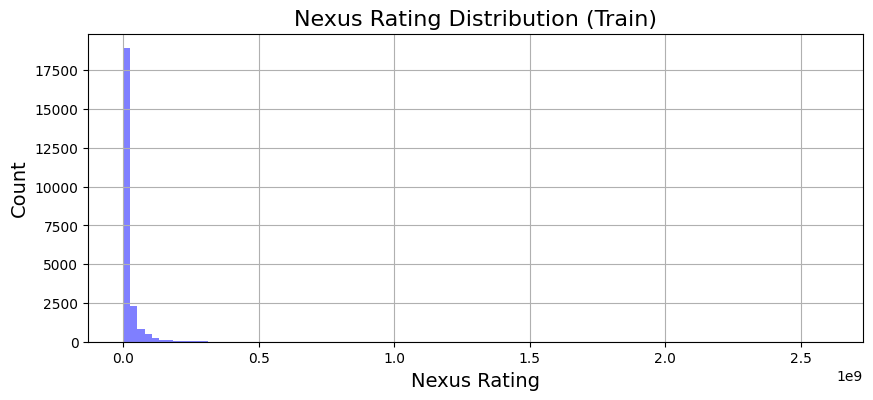

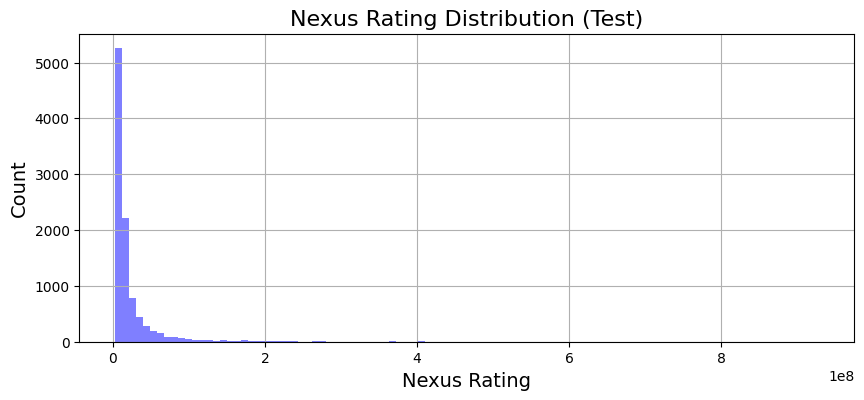

In [186]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
test['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Test Target Distributuon')
ax.set_title('Nexus Rating Distribution (Test)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Ser at dataene samsvarer mye bedre etter at vi har byttet om på kolonnene

In [187]:
# Log-transformasjon av target (nexus_rating) for bedre modellering og RMSLE-optimalisering
X_train = train.drop(columns=['nexus_rating', 'ownership_type'])
X_test = test.drop(columns=['nexus_rating', 'ownership_type']) 
y_train_log = np.log1p(train['nexus_rating'])  # log(1 + nexus_rating)
y_test_log = np.log1p(test['nexus_rating'])  # log(1 + nexus_rating)

In [188]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [193]:
# Konverterer kategoriske kolonner til string
X_train['vertical_alignment'] = X_train['vertical_alignment'].astype(str)
X_train['energy_flow_design'] = X_train['energy_flow_design'].astype(str)
X_train['efficiency_grade'] = X_train['efficiency_grade'].astype(str)

X_test['vertical_alignment'] = X_test['vertical_alignment'].astype(str)
X_test['energy_flow_design'] = X_test['energy_flow_design'].astype(str)
X_test['efficiency_grade'] = X_test['efficiency_grade'].astype(str)

train_pool = Pool(X_train, y_train_log, cat_features=['vertical_alignment', 'energy_flow_design', 'efficiency_grade'])
test_pool = Pool(X_test, y_test_log, cat_features=['vertical_alignment', 'energy_flow_design', 'efficiency_grade'])

# Inialisering av CatBoostRegressor
model = CatBoostRegressor(
    cat_features=['vertical_alignment', 'energy_flow_design', 'efficiency_grade'],
    iterations=1000,
    learning_rate=0.05,
    depth=10,
    eval_metric='RMSE',
    verbose=0,
    random_seed=42,
)
model.fit(train_pool)


# Prediksjon av testsettet
predictions = model.predict(test_pool)

# Konverterer prediksjonene tilbake til normal skala
y_pred = np.expm1(predictions)  # Inverse of log(1 + x)

# Beregner RMSLE
test['pred'] = y_pred
print('RMSLE: ', round(rmsle(test['nexus_rating'], test['pred']), 3))
print('Required RMSLE: ', 0.294)

RMSLE:  0.304
Required RMSLE:  0.294


#### Har prøvd å få ned RMSLE uendelig lenge, men får den ikke lavere 🥲

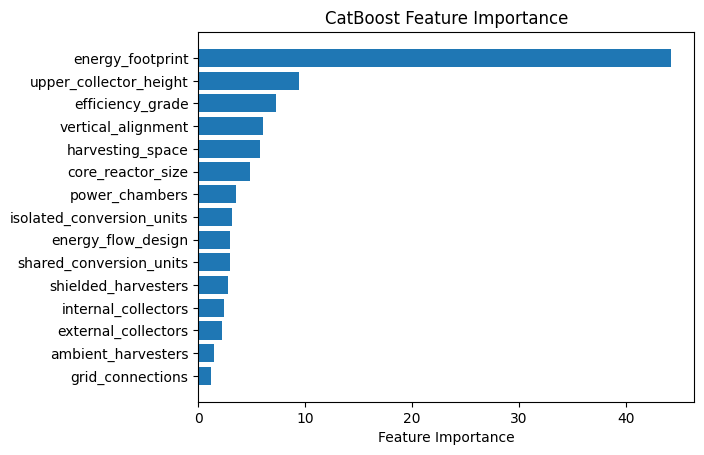

In [199]:
feature_importances = model.get_feature_importance(train_pool)

feature_names = X_train.columns

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importance
plt.figure()
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()  
plt.show()